# EEG Eye State Data Set
The data set consists of 14 EEG values and a value indicating the eye state. Eye state equal to '1' indicates the eye is closed and '0' indicates the eye is open. 

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('EEGEyeState.csv')

In [3]:
print('df type: ' + str(type(df)))
print('df size: ' + str(df.shape))
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df size: (14980, 15)


,@AF3,@ F2,@ F3,@FC5,@T7,@P7,@O1,@O2,@P8,@T8,@FC6,@F4,@F8,@AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


###### Oberving the Data Set
1. Checks for null values.
2. Sees how many classes/categories there are.
3. Counts the data points that belong to each category.

In [4]:
#Observing the EEGState Eye Data Set.
print('Number of NULL values in df: ' + str(df.isnull().sum().sum())) 

uniqueClasses = df['eyeDetection'].unique()
print('Number of unique classes in df: ' + str(uniqueClasses.shape))
uniqueClasses = np.sort(uniqueClasses)

for i in uniqueClasses:
    print('Class ' + str(i) + ' count: ' + str((df['eyeDetection']==i).sum()))

Number of NULL values in df: 0
Number of unique classes in df: (2,)
Class 0 count: 8257
Class 1 count: 6723


###### Shuffle Data Randomly
1. Saves the first random shuffle of the original df.
2. Saves the second random shuffle of the original df.
3. Saves the third random shuffle of the original df.

In [5]:
df_shuffle1 = df.sample(frac=1)
#df_shuffle1.head()

In [6]:
df_shuffle2 = df.sample(frac=1)
#df_shuffle2.head()

In [7]:
df_shuffle3 = df.sample(frac=1)
#df_shuffle3.head()

###### F(X) = Y
Separates data into X and Y (labels) to set up the rest of the supervised learning algos in the [ F(X) = Y ] format.
1. Sets up F(X1) = Y1 from the first random shuffle of the original df.
2. Sets up F(X2) = Y2 from the second random shuffle of the original df.
3. Sets up F(X3) = Y3 from the third random shuffle of the orignal df.

In [8]:
denominator = 6

In [9]:
df_array1 = np.array(df_shuffle1)              #Convert dataframe to array in order to slice into X and Y.
#Reduce the number of rows by a certain fraction. This is to reduce the run time.
cutNumber = int(df_array1.shape[0]/denominator)          
df_array1 = df_array1[0:cutNumber, :]
print(df_array1.shape)

X1 = df_array1[:, 0:(df_array1.shape[1] - 1)]  #First Column to second before last column. All numerical Features.
Y1 = df_array1[:, (df_array1.shape[1] - 1)]    #Last column represents the classes which are all numerical.
print('X1 shape: ' + str(X1.shape))
print('Y1 shape: ' + str(Y1.shape))

(2496, 15)
X1 shape: (2496, 14)
Y1 shape: (2496,)


In [10]:
df_array2 = np.array(df_shuffle2)              #Convert dataframe to array in order to slice into X and Y.

#Reduce the number of rows by a certain fraction. This is to reduce the run time.
cutNumber = int(df_array2.shape[0]/denominator)          
df_array2 = df_array2[0:cutNumber, :]
print(df_array2.shape)

X2 = df_array2[:, 0:(df_array2.shape[1] - 1)]  #First Column to second before last column. All numerical Features.
Y2 = df_array2[:, (df_array2.shape[1] - 1)]    #Last column represents the classes which are all numerical.
print('X2 shape: ' + str(X2.shape))
print('Y2 shape: ' + str(Y2.shape))

(2496, 15)
X2 shape: (2496, 14)
Y2 shape: (2496,)


In [11]:
df_array3 = np.array(df_shuffle3)              #Convert dataframe to array in order to slice into X and Y.

#Reduce the number of rows by a certain fraction. This is to reduce the run time.
cutNumber = int(df_array3.shape[0]/denominator)          
df_array3 = df_array3[0:cutNumber, :]
print(df_array3.shape)

X3 = df_array3[:, 0:(df_array3.shape[1] - 1)]  #First Column to second before last column. All numerical Features.
Y3 = df_array3[:, (df_array3.shape[1] - 1)]    #Last column represents the classes which are all numerical.
print('X3 shape: ' + str(X3.shape))
print('Y3 shape: ' + str(Y3.shape))

#print(X3[:, 0])
#print(Y3)

(2496, 15)
X3 shape: (2496, 14)
Y3 shape: (2496,)


###### Functions Used For All Classifiers
1. partitionData
2. viewSplit
3. draw_heatmap_linear
4. bestValue
5. ViewConfusionMatrix
6. displayAccuracies

In [12]:
#X: Features of df.
#Y: Labels of df.
#percent: The percentage given to the training_validation set.
def partitionData(X, Y, percent):
    X_train_val = X[:int(percent*len(X))] # Get features from train + val set.
    Y_train_val = Y[:int(percent*len(Y))] # Get labels from train + val set.
    X_test      = X[int(percent*len(X)):] # Get features from test set.     
    Y_test      = Y[int(percent*len(Y)):] # Get labels from test set.
    
    return X_train_val, Y_train_val, X_test, Y_test

In [13]:
#PURPOSE: Used to see the dimensions of the data after being partioned.
#Prints the shape of X_train_val.
#Prints the shape of Y_train_val.
#Prints the shape of X_test.
#Prints the shape of Y_test.
#Prints num of UNIQUE classes in Y_train_val.
#Prints the num of data points that belong to each class/category.
#Prints num of UNIQUE classes in Y_test.
def viewSplit(X_train_val, Y_train_val, X_test, Y_test):
    print('X_train_val shape: ' + str(X_train_val.shape))
    print('Y_train_val shape: ' + str(Y_train_val.shape))
    print('X_test: ' + str(X_test.shape))
    print('Y_test: ' + str(Y_test.shape))

    uniqueClasses = df['Type'].unique()
    print('Number of unique classes in df: ' + str(uniqueClasses.shape))
    uniqueClasses = np.sort(uniqueClasses)
    
    uniqueClasses_Y_train_val = np.unique(Y_train_val)
    print('Number of unique classes in Y_train_val: ' + str(uniqueClasses_Y_train_val.shape))
    for i in uniqueClasses:
        print('Class ' + str(i) + ' count: ' + str((Y_train_val[:]==i).sum()))
    uniqueClasses_Y_test = np.unique(Y_test)
    print('Number of unique classes in Y_test: ' + str(uniqueClasses_Y_test.shape))

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

#PURPOSE: Draw heatmaps for result of grid search and find best C for validation set.
def draw_heatmap_linear(acc, acc_desc, C_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=C_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$C$')
    plt.title(acc_desc + ' w.r.t $C$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

In [15]:
#PURPOSE: Searches for the highest value in accuracyValidation, then uses the index of the highest value
#         to find what value in the list caused this.
def bestValue(accuracyValidation, valueList):
    max_value_of_accV = np.max(accuracyValidation)
    max_index_of_accV = np.argmax(accuracyValidation)
    print('Largest value in accuracyValidation is ' + str(max_value_of_accV) + ' from index ' + str(max_index_of_accV) + '.')
    return valueList[max_index_of_accV]

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def ViewConfusionMatrix(Y_test, pred):
    print('Original labels:\n' + str(Y_test))
    print('Original Labels or Y_test shape: ' + str(Y_test.shape))
    print('Predicted labels:\n' + str(pred))

    #Note that the shape of the confusion matrix is not based on the shape of the Y_test or pred, but instead on 
    #how many unique classes were inside of these.
    print('\nTest Accuracy Score: ' + str(accuracy_score(Y_test, pred)))
    print(classification_report(Y_test, pred))
    confusionMatrix = confusion_matrix(Y_test, pred)
    print('Confusion Matrix shape: ' + str(confusionMatrix.shape))
    print(confusionMatrix) #Remove because it takes up to much space.....

In [17]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

def displayAccuracies(stringClfName, stringDataName, acc80_20, acc50_50, acc20_80):
 
    objects = ('80%train,20%test', '50%train,50%test', '20%train,80%test')
    y_pos = np.arange(len(objects))
    performance = [acc80_20,acc50_50,acc20_80]
 
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Accuracy')
    plt.title(str(stringClfName) +'\'s Test Accuracies of 3 Partitions on ' + str(stringDataName))
    plt.grid() #new
    plt.show()

In [18]:
#PURPOSE to print out the accuracies of 3 trials for each of the 3 partitions. 
def printAccuracies(stringClgName, list_80_20, list_50_50, list20_80):
    
    print('Accuracy of ' + str(stringClgName) +'\'s 3 trials on (80% train, 20% test) partition :' + str(list_80_20)) 
    accuracyAverage_80_20 = np.mean(list_80_20)
    print('Mean Accuracy of ' + str(stringClgName) +' on (80% train, 20% test) partition: ' + str(accuracyAverage_80_20))

    print('\nAccuracy of ' + str(stringClgName) + '\'s 3 trials on (50% train, 50% test) partition :' + str(list_50_50))
    accuracyAverage_50_50 = np.mean(list_50_50)
    print('Mean Accuracy of ' + str(stringClgName) + ' on (50% train, 50% test) partition: ' + str(accuracyAverage_50_50))

    print('\nAccuracy of ' + str(stringClgName) + '\'s 3 trials on (20% train, 80% test) partition:' + str(list20_80))
    accuracyAverage_20_80 = np.mean(list20_80)
    print('Mean Accuracy of ' + str(stringClgName) + ' on (20% train, 80% test) partition: ' + str(accuracyAverage_20_80))

###### Global Variables
CV: The number of folds that happens in the cross validation produced by GridSearchCV.

In [19]:
#Recommend running final test with CV=10, but during staging use CV=3.
CV = 10

# Support Vector Machine (SVM)
Its a supervised machine learning algorithm which can be used for both classification or regression problems. But it is usually used for classification. Given 2 or more labeled classes of data, it acts as a discriminative classifier, formally defined by an optimal hyperplane that separates all the classes.

In [20]:
#GLOBAL VARIABLES FOR SVM
C_list = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 100]
SVM_accuracyTestList_80_20 = []
SVM_accuracyTestList_50_50 = []
SVM_accuracyTestList_20_80 = []

In [21]:
from sklearn import svm

#C_list: C hyperparameter.
#cv: Number of folds when doing cross validation.
def svmTrainValidation(X_train_val, Y_train_val, C_list, CV):
    
    svm_classifier = svm.SVC(kernel = 'linear')
    
    parameters = {'C':C_list}
    
    SVM_clfGridSearch = GridSearchCV(svm_classifier, param_grid=parameters, cv=CV, return_train_score=True)
    SVM_clfGridSearch.fit(X_train_val, Y_train_val) 
    
    #accuracyTrain = clfGridSearch.cv_results_['mean_train_score']      
    #accuracyValidation = clfGridSearch.cv_results_['mean_test_score']
    return SVM_clfGridSearch

### SVM on (80% train, 20% test)
Splits the 3 shuffled datasets into 2 parts:
1. (80% of all the data points) ---> Training set + Validation Set.
2. (20% of all the data points) ---> Test set.

In [22]:
X1_train_val, Y1_train_val, X1_test, Y1_test = partitionData(X1, Y1, 0.8)
X2_train_val, Y2_train_val, X2_test, Y2_test = partitionData(X2, Y2, 0.8)
X3_train_val, Y3_train_val, X3_test, Y3_test = partitionData(X3, Y3, 0.8)

###### 1st Run)
First run uses the variables; X1_train_val, Y1_train_val, X1_test, Y1_test

[ 0.62179919  0.65202719  0.66460681  0.6535315   0.64256302  0.64261879
  0.64579434  0.64334519]
[ 0.61873747  0.64228457  0.65330661  0.64428858  0.63376754  0.62274549
  0.63927856  0.63877756]


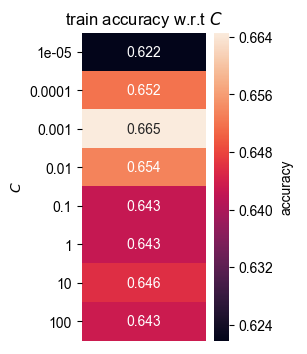

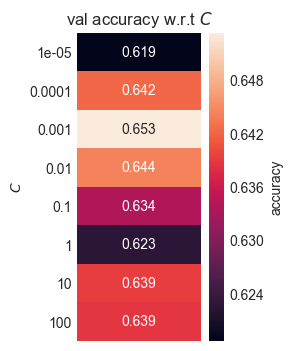

In [23]:
SVM_clfGridSearch = svmTrainValidation(X1_train_val, Y1_train_val, C_list, CV)
accuracyTrain = SVM_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = SVM_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', C_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', C_list)

In [24]:
#Use the best C to calculate the test accuracy.
best_C = bestValue(accuracyValidation, C_list)
print('Best C: ' + str(best_C))

optimalClassifier = svm.SVC(kernel = 'linear', C = best_C).fit(X1_train_val, Y1_train_val)
pred = optimalClassifier.predict(X1_test)
# correct = [(a==b) for (a,b) in zip(pred,Y1_test)]
# test_acc = sum(correct) * 1.0 / len(correct)
# print('Test Accuracy Score: ' + str(test_acc))

#accuracy(ORIGINAL_VALUES, PREDICTED_VALUES)
accuracyTest = accuracy_score(Y1_test, pred)
SVM_accuracyTestList_80_20.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.653306613226 from index 2.
Best C: 0.001
Test Accuracy Score: 0.68


###### 2nd Run)
Second run uses the variables; X2_train_val, Y2_train_val, X2_test, Y2_test

[ 0.61756833  0.62486061  0.63822104  0.63120693  0.6285351   0.62241289
  0.62736655  0.62341419]
[ 0.61623246  0.6257515   0.62675351  0.63076152  0.61923848  0.61723447
  0.61422846  0.62324649]


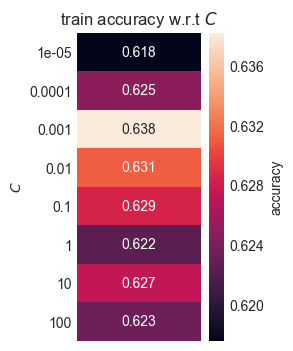

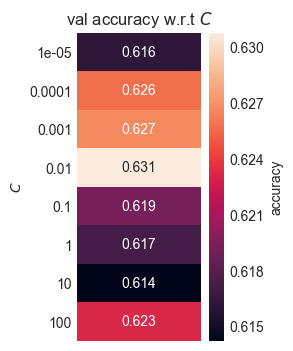

In [25]:
SVM_clfGridSearch = svmTrainValidation(X2_train_val, Y2_train_val, C_list, CV)
accuracyTrain = SVM_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = SVM_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', C_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', C_list)

In [26]:
best_C = bestValue(accuracyValidation, C_list)
print('Best C: ' + str(best_C))

optimalClassifier = svm.SVC(kernel = 'linear', C = best_C).fit(X2_train_val, Y2_train_val)
pred = optimalClassifier.predict(X2_test)

accuracyTest = accuracy_score(Y2_test, pred)
SVM_accuracyTestList_80_20.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.630761523046 from index 3.
Best C: 0.01
Test Accuracy Score: 0.614


###### 3rd Run)
Third run uses the variables; X3_train_val, Y3_train_val, X3_test, Y3_test

[ 0.63688591  0.66933894  0.67440458  0.67100917  0.66126743  0.65870541
  0.6558134   0.65625713]
[ 0.63426854  0.66733467  0.66683367  0.66482966  0.65480962  0.65981964
  0.65430862  0.65330661]


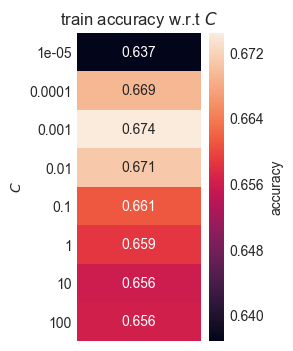

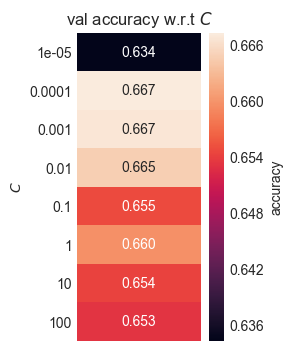

In [27]:
SVM_clfGridSearch = svmTrainValidation(X3_train_val, Y3_train_val, C_list, CV)
accuracyTrain = SVM_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = SVM_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', C_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', C_list)

In [28]:
best_C = bestValue(accuracyValidation, C_list)
print('Best C: ' + str(best_C))

optimalClassifier = svm.SVC(kernel = 'linear', C = best_C).fit(X3_train_val, Y3_train_val)
pred = optimalClassifier.predict(X3_test)

accuracyTest = accuracy_score(Y3_test, pred)
SVM_accuracyTestList_80_20.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.667334669339 from index 1.
Best C: 0.0001
Test Accuracy Score: 0.616


###### Mean of SVM's Test Accuracies on (80% train, 20% test)

In [29]:
import statistics 

print('SVM_accuracyTestList:' + str(SVM_accuracyTestList_80_20))
SVM_accuracyAverage_80_20 = statistics.mean(SVM_accuracyTestList_80_20)
print('SVM_accuracyTestList mean: ' + str(SVM_accuracyAverage_80_20))

SVM_accuracyTestList:[0.68000000000000005, 0.61399999999999999, 0.61599999999999999]
SVM_accuracyTestList mean: 0.636666666667


### SVM on (50% train, 50% test)
Splits the 3 shuffled datasets into 2 parts:
1. (50% of all the data points) ---> Training set + Validation Set.
2. (50% of all the data points) ---> Test set.

In [30]:
X1_train_val, Y1_train_val, X1_test, Y1_test = partitionData(X1, Y1, 0.5)
X2_train_val, Y2_train_val, X2_test, Y2_test = partitionData(X2, Y2, 0.5)
X3_train_val, Y3_train_val, X3_test, Y3_test = partitionData(X3, Y3, 0.5)

###### 1st Run)
First run uses the variables; X1_train_val, Y1_train_val, X1_test, Y1_test

[ 0.59989279  0.63221132  0.65197902  0.64271811  0.62714031  0.62429127
  0.6252696   0.62393508]
[ 0.59134615  0.62740385  0.63301282  0.63060897  0.60897436  0.60496795
  0.60817308  0.61217949]


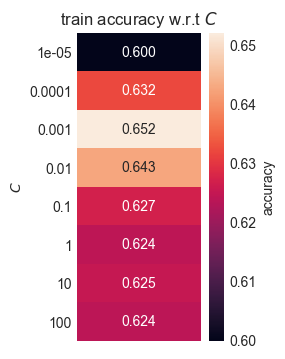

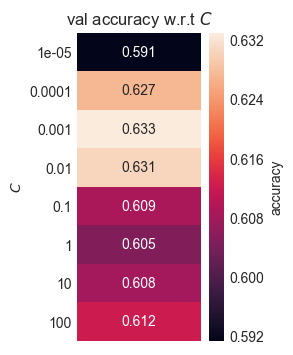

In [31]:
SVM_clfGridSearch = svmTrainValidation(X1_train_val, Y1_train_val, C_list, CV)
accuracyTrain = SVM_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = SVM_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', C_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', C_list)

In [32]:
best_C = bestValue(accuracyValidation, C_list)
print('Best C: ' + str(best_C))

optimalClassifier = svm.SVC(kernel = 'linear', C = best_C).fit(X1_train_val, Y1_train_val)
pred = optimalClassifier.predict(X1_test)

accuracyTest = accuracy_score(Y1_test, pred)
SVM_accuracyTestList_50_50.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.633012820513 from index 2.
Best C: 0.001
Test Accuracy Score: 0.673878205128


###### 2nd Run)
Second run uses the variables; X2_train_val, Y2_train_val, X2_test, Y2_test

[ 0.60763914  0.62544454  0.62339685  0.6163607   0.61271254  0.61592109
  0.61360356  0.61173199]
[ 0.60336538  0.60817308  0.61298077  0.60096154  0.60657051  0.59054487
  0.59375     0.59054487]


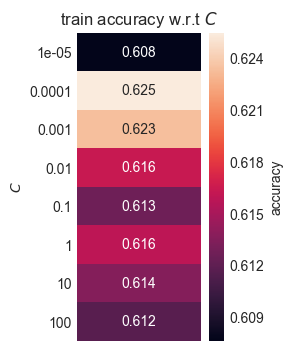

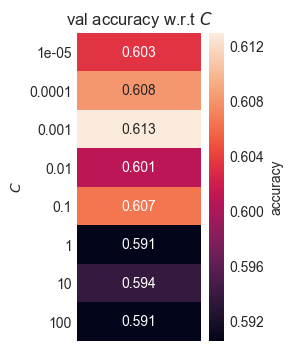

In [33]:
SVM_clfGridSearch = svmTrainValidation(X2_train_val, Y2_train_val, C_list, CV)
accuracyTrain = SVM_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = SVM_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', C_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', C_list)

In [34]:
best_C = bestValue(accuracyValidation, C_list)
print('Best C: ' + str(best_C))

optimalClassifier = svm.SVC(kernel = 'linear', C = best_C).fit(X2_train_val, Y2_train_val)
pred = optimalClassifier.predict(X2_test)

accuracyTest = accuracy_score(Y2_test, pred)
SVM_accuracyTestList_50_50.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.612980769231 from index 2.
Best C: 0.001
Test Accuracy Score: 0.624198717949


###### 3rd Run)
Third run uses the variables; X3_train_val, Y3_train_val, X3_test, Y3_test

[ 0.60274351  0.64983973  0.66230491  0.65473574  0.64645649  0.64378516
  0.64966187  0.64619078]
[ 0.59695513  0.64583333  0.64903846  0.64342949  0.63621795  0.63060897
  0.64182692  0.64182692]


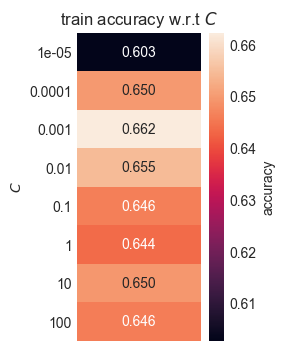

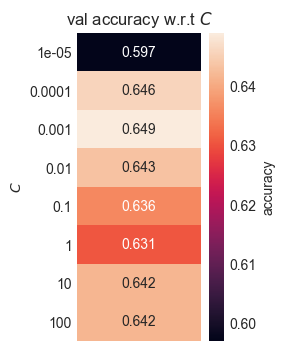

In [35]:
SVM_clfGridSearch = svmTrainValidation(X3_train_val, Y3_train_val, C_list, CV)
accuracyTrain = SVM_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = SVM_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', C_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', C_list)

In [36]:
best_C = bestValue(accuracyValidation, C_list)
print('Best C: ' + str(best_C))

optimalClassifier = svm.SVC(kernel = 'linear', C = best_C).fit(X3_train_val, Y3_train_val)
pred = optimalClassifier.predict(X3_test)

accuracyTest = accuracy_score(Y3_test, pred)
SVM_accuracyTestList_50_50.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.649038461538 from index 2.
Best C: 0.001
Test Accuracy Score: 0.665064102564


###### Mean of SVM's Test Accuracies on (50% train, 50% test)

In [37]:
print('SVM_accuracyTestList:' + str(SVM_accuracyTestList_50_50))
SVM_accuracyAverage_50_50 = statistics.mean(SVM_accuracyTestList_50_50)
print('SVM_accuracyTestList mean: ' + str(SVM_accuracyAverage_50_50))

SVM_accuracyTestList:[0.67387820512820518, 0.62419871794871795, 0.66506410256410253]
SVM_accuracyTestList mean: 0.65438034188


### SVM on (20% train, 80% test)
Splits the 3 shuffled datasets into 2 parts:
1. (20% of all the data points) ---> Training set + Validation Set.
2. (80% of all the data points) ---> Test set.

In [38]:
X1_train_val, Y1_train_val, X1_test, Y1_test = partitionData(X1, Y1, 0.2)
X2_train_val, Y2_train_val, X2_test, Y2_test = partitionData(X2, Y2, 0.2)
X3_train_val, Y3_train_val, X3_test, Y3_test = partitionData(X3, Y3, 0.5)

###### 1st Run)
First run uses the variables; X1_train_val, Y1_train_val, X1_test, Y1_test

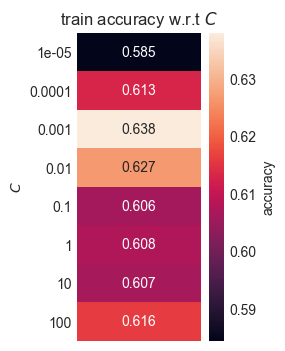

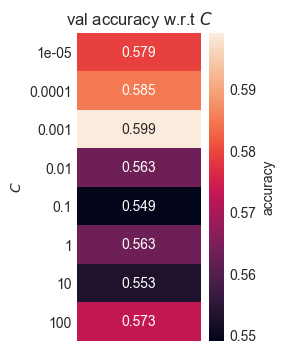

In [39]:
SVM_clfGridSearch = svmTrainValidation(X1_train_val, Y1_train_val, C_list, CV)
accuracyTrain = SVM_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = SVM_clfGridSearch.cv_results_['mean_test_score']

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', C_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', C_list)

In [40]:
best_C = bestValue(accuracyValidation, C_list)
print('Best C: ' + str(best_C))

optimalClassifier = svm.SVC(kernel = 'linear', C = best_C).fit(X1_train_val, Y1_train_val)
pred = optimalClassifier.predict(X1_test)

accuracyTest = accuracy_score(Y1_test, pred)
SVM_accuracyTestList_20_80.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.599198396794 from index 2.
Best C: 0.001
Test Accuracy Score: 0.658988482724


###### 2nd Run)
Second run uses the variables; X2_train_val, Y2_train_val, X2_test, Y2_test

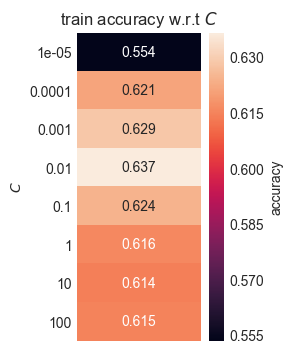

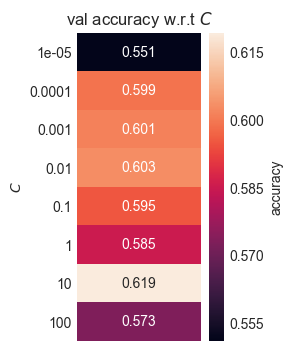

In [41]:
SVM_clfGridSearch = svmTrainValidation(X2_train_val, Y2_train_val, C_list, CV)
accuracyTrain = SVM_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = SVM_clfGridSearch.cv_results_['mean_test_score']

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', C_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', C_list)

In [42]:
best_C = bestValue(accuracyValidation, C_list)
print('Best C: ' + str(best_C))

optimalClassifier = svm.SVC(kernel = 'linear', C = best_C).fit(X2_train_val, Y2_train_val)
pred = optimalClassifier.predict(X2_test)

accuracyTest = accuracy_score(Y2_test, pred)
SVM_accuracyTestList_20_80.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.619238476954 from index 6.
Best C: 10
Test Accuracy Score: 0.594391587381


###### 3rd Run)
Third run uses the variables; X3_train_val, Y3_train_val, X3_test, Y3_test

[ 0.60274351  0.64983973  0.66230491  0.65473574  0.64645649  0.64378516
  0.64966187  0.64619078]
[ 0.59695513  0.64583333  0.64903846  0.64342949  0.63621795  0.63060897
  0.64182692  0.64182692]


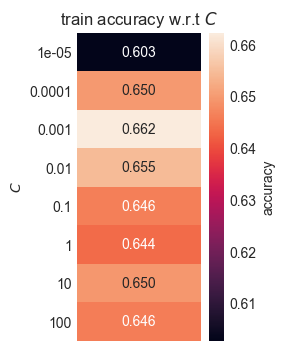

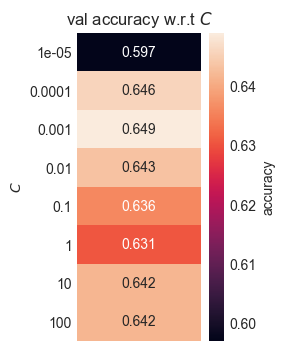

In [43]:
SVM_clfGridSearch = svmTrainValidation(X3_train_val, Y3_train_val, C_list, CV)
accuracyTrain = SVM_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = SVM_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', C_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', C_list)

In [44]:
best_C = bestValue(accuracyValidation, C_list)
print('Best C: ' + str(best_C))

optimalClassifier = svm.SVC(kernel = 'linear', C = best_C).fit(X3_train_val, Y3_train_val)
pred = optimalClassifier.predict(X3_test)

accuracyTest = accuracy_score(Y3_test, pred)
SVM_accuracyTestList_20_80.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.649038461538 from index 2.
Best C: 0.001
Test Accuracy Score: 0.665064102564


###### Mean of SVM's Test Accuracies on (20% train, 80% test)

In [45]:
print('SVM_accuracyTestList:' + str(SVM_accuracyTestList_20_80))
SVM_accuracyAverage_20_80 = statistics.mean(SVM_accuracyTestList_20_80)
print('SVM_accuracyTestList mean: ' + str(SVM_accuracyAverage_20_80))

SVM_accuracyTestList:[0.65898848272408617, 0.59439158738107156, 0.66506410256410253]
SVM_accuracyTestList mean: 0.63948139089


### **<font color=green>Results of SVM</font>**

In [46]:
print('SVM_accuracyTestList (80% train, 20% test) partition mean: ' + str(SVM_accuracyAverage_80_20))
print('SVM_accuracyTestList (50% train, 50% test) partition mean: ' + str(SVM_accuracyAverage_50_50))
print('SVM_accuracyTestList (20% train, 80% test) partition mean: ' + str(SVM_accuracyAverage_20_80))

SVM_accuracyTestList (80% train, 20% test) partition mean: 0.636666666667
SVM_accuracyTestList (50% train, 50% test) partition mean: 0.65438034188
SVM_accuracyTestList (20% train, 80% test) partition mean: 0.63948139089


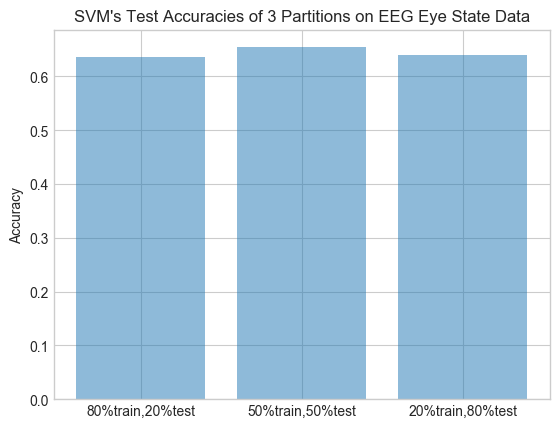

Accuracy of SVM's 3 trials on (80% train, 20% test) partition :[0.68000000000000005, 0.61399999999999999, 0.61599999999999999]
Mean Accuracy of SVM on (80% train, 20% test) partition: 0.636666666667

Accuracy of SVM's 3 trials on (50% train, 50% test) partition :[0.67387820512820518, 0.62419871794871795, 0.66506410256410253]
Mean Accuracy of SVM on (50% train, 50% test) partition: 0.65438034188

Accuracy of SVM's 3 trials on (20% train, 80% test) partition:[0.65898848272408617, 0.59439158738107156, 0.66506410256410253]
Mean Accuracy of SVM on (20% train, 80% test) partition: 0.63948139089


In [47]:
displayAccuracies('SVM', 'EEG Eye State Data', SVM_accuracyAverage_80_20, SVM_accuracyAverage_50_50, SVM_accuracyAverage_20_80)
printAccuracies('SVM', SVM_accuracyTestList_80_20, SVM_accuracyTestList_50_50, SVM_accuracyTestList_20_80)

# Decision Tree 
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [48]:
#GLOBAL VARIABLES FOR Decision Tree
#D_list = np.asarray([1,2,3,4,5])
D_list = [1,2,3,4,5]
DT_accuracyTestList_80_20 = []
DT_accuracyTestList_50_50 = []
DT_accuracyTestList_20_80 = []

In [49]:
from sklearn import tree

def decisionTreeTrainValidation(X_train_val, Y_train_val, D_list, CV):
    
    DT_classifier = tree.DecisionTreeClassifier(criterion='entropy')

    parameters = {'max_depth': D_list}

    DT_clfGridSearch = GridSearchCV(DT_classifier, param_grid=parameters, cv=CV, return_train_score=True)
    DT_clfGridSearch.fit(X_train_val, Y_train_val)

    return DT_clfGridSearch

### Decision Tree on (80% train, 20% test)
Splits the 3 shuffled datasets into 2 parts:
1. (80% of all the data points) ---> Training set + Validation Set.
2. (20% of all the data points) ---> Test set.

In [50]:
X1_train_val, Y1_train_val, X1_test, Y1_test = partitionData(X1, Y1, 0.8)
X2_train_val, Y2_train_val, X2_test, Y2_test = partitionData(X2, Y2, 0.8)
X3_train_val, Y3_train_val, X3_test, Y3_test = partitionData(X3, Y3, 0.8)

###### 1st Run)
First run uses the variables; X1_train_val, Y1_train_val, X1_test, Y1_test

[ 0.60949713  0.62018552  0.6620486   0.70351787  0.73274507]
[ 0.60470942  0.60971944  0.6252505   0.6753507   0.68737475]


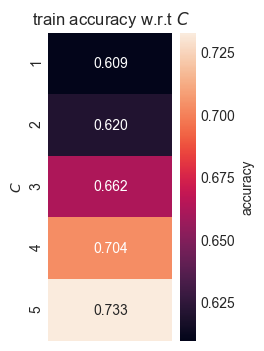

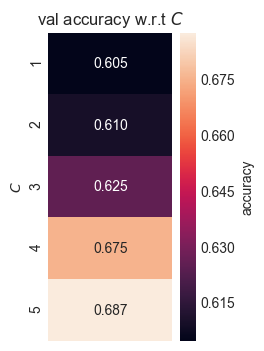

In [51]:
DT_clfGridSearch = decisionTreeTrainValidation(X1_train_val, Y1_train_val, D_list, CV)
accuracyTrain = DT_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = DT_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', D_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', D_list)

In [52]:
best_D = bestValue(accuracyValidation, D_list)
print('Best D: ' + str(best_D))

optimalClassifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_D).fit(X1_train_val, Y1_train_val)
pred = optimalClassifier.predict(X1_test)

accuracyTest = accuracy_score(Y1_test, pred)
DT_accuracyTestList_80_20.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.687374749499 from index 4.
Best D: 5
Test Accuracy Score: 0.706


###### 2nd Run)
Second run uses the variables; X2_train_val, Y2_train_val, X2_test, Y2_test

[ 0.59469058  0.6440149   0.66371893  0.68815442  0.7226687 ]
[ 0.56613226  0.63176353  0.6508016   0.66182365  0.6748497 ]


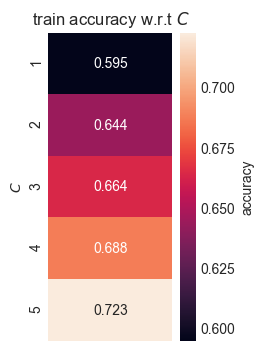

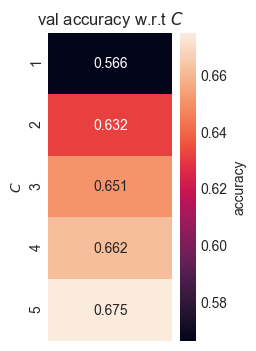

In [53]:
DT_clfGridSearch = decisionTreeTrainValidation(X2_train_val, Y2_train_val, D_list, CV)
accuracyTrain = DT_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = DT_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', D_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', D_list)

In [54]:
#Use the best C to calculate the test accuracy.
best_D = bestValue(accuracyValidation, D_list)
print('Best D: ' + str(best_D))

optimalClassifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_D).fit(X2_train_val, Y2_train_val)
pred = optimalClassifier.predict(X2_test)

accuracyTest = accuracy_score(Y2_test, pred)
DT_accuracyTestList_80_20.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.674849699399 from index 4.
Best D: 5
Test Accuracy Score: 0.664


###### 3rd Run)
Third run uses the variables; X3_train_val, Y3_train_val, X3_test, Y3_test

[ 0.61266976  0.62213235  0.68347879  0.71264876  0.73341329]
[ 0.60370741  0.60521042  0.66332665  0.67685371  0.68286573]


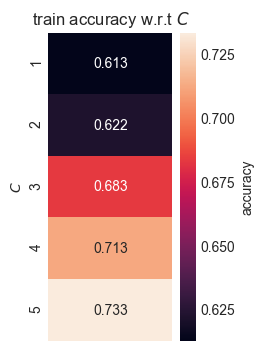

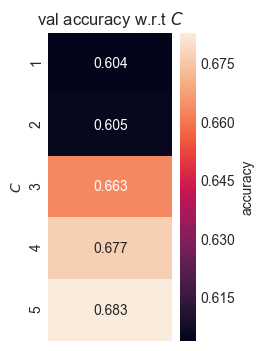

In [55]:
DT_clfGridSearch = decisionTreeTrainValidation(X3_train_val, Y3_train_val, D_list, CV)
accuracyTrain = DT_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = DT_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', D_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', D_list)

In [56]:
#Use the best C to calculate the test accuracy.
best_D = bestValue(accuracyValidation, D_list)
print('Best D: ' + str(best_D))

optimalClassifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_D).fit(X3_train_val, Y3_train_val)
pred = optimalClassifier.predict(X3_test)

accuracyTest = accuracy_score(Y3_test, pred)
DT_accuracyTestList_80_20.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.682865731463 from index 4.
Best D: 5
Test Accuracy Score: 0.698


###### Mean of DT's Test Accuracies on (80% train, 20% test)

In [57]:
print('DT_accuracyTestList:' + str(DT_accuracyTestList_80_20))
DT_accuracyAverage_80_20 = statistics.mean(DT_accuracyTestList_80_20)
print('DT_accuracyTestList mean: ' + str(DT_accuracyAverage_80_20))

DT_accuracyTestList:[0.70599999999999996, 0.66400000000000003, 0.69799999999999995]
DT_accuracyTestList mean: 0.689333333333


### Decision Tree on (50% train, 50% test)
Splits the 3 shuffled datasets into 2 parts:
1. (50% of all the data points) ---> Training set + Validation Set.
2. (50% of all the data points) ---> Test set.

In [58]:
X1_train_val, Y1_train_val, X1_test, Y1_test = partitionData(X1, Y1, 0.5)
X2_train_val, Y2_train_val, X2_test, Y2_test = partitionData(X2, Y2, 0.5)
X3_train_val, Y3_train_val, X3_test, Y3_test = partitionData(X3, Y3, 0.5)

###### 1st Run)
First run uses the variables; X1_train_val, Y1_train_val, X1_test, Y1_test

[ 0.59642146  0.61271417  0.66257414  0.69426942  0.74929571]
[ 0.56730769  0.59855769  0.62099359  0.64823718  0.68669872]


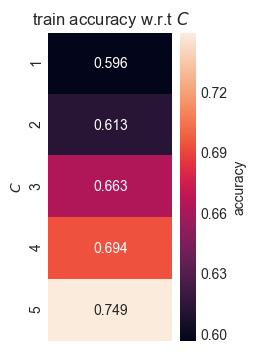

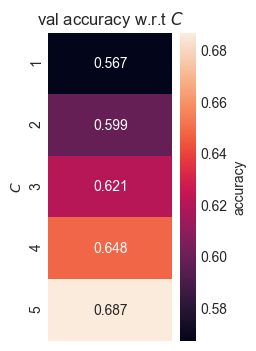

In [59]:
DT_clfGridSearch = decisionTreeTrainValidation(X1_train_val, Y1_train_val, D_list, CV)
accuracyTrain = DT_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = DT_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', D_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', D_list)

In [60]:
best_D = bestValue(accuracyValidation, D_list)
print('Best D: ' + str(best_D))

optimalClassifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_D).fit(X1_train_val, Y1_train_val)
pred = optimalClassifier.predict(X1_test)

accuracyTest = accuracy_score(Y1_test, pred)
DT_accuracyTestList_50_50.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.686698717949 from index 4.
Best D: 5
Test Accuracy Score: 0.720352564103


###### 2nd Run)
Second run uses the variables; X2_train_val, Y2_train_val, X2_test, Y2_test

[ 0.59749061  0.62785223  0.6581202   0.70014303  0.72658728]
[ 0.57211538  0.60176282  0.62820513  0.64903846  0.64823718]


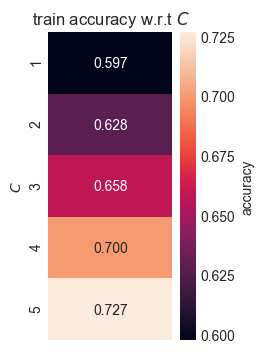

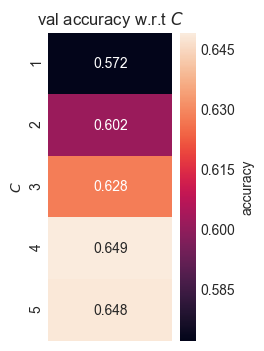

In [61]:
DT_clfGridSearch = decisionTreeTrainValidation(X2_train_val, Y2_train_val, D_list, CV)
accuracyTrain = DT_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = DT_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', D_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', D_list)

In [62]:
best_D = bestValue(accuracyValidation, D_list)
print('Best D: ' + str(best_D))

optimalClassifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_D).fit(X2_train_val, Y2_train_val)
pred = optimalClassifier.predict(X2_test)

accuracyTest = accuracy_score(Y2_test, pred)
DT_accuracyTestList_50_50.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.649038461538 from index 3.
Best D: 4
Test Accuracy Score: 0.689903846154


###### 3rd Run)
Third run uses the variables; X3_train_val, Y3_train_val, X3_test, Y3_test

[ 0.60888515  0.63265735  0.68269205  0.7134077   0.74421241]
[ 0.58413462  0.59615385  0.64583333  0.66185897  0.65544872]


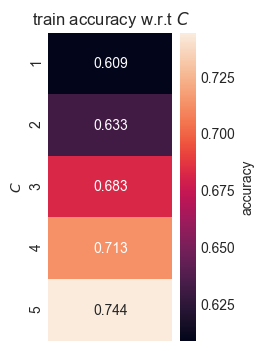

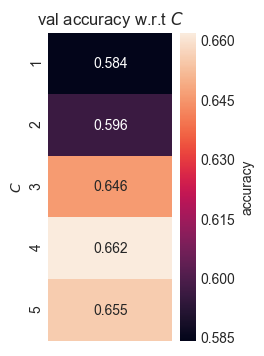

In [63]:
DT_clfGridSearch = decisionTreeTrainValidation(X3_train_val, Y3_train_val, D_list, CV)
accuracyTrain = DT_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = DT_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', D_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', D_list)

In [64]:
best_D = bestValue(accuracyValidation, D_list)
print('Best D: ' + str(best_D))

optimalClassifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_D).fit(X3_train_val, Y3_train_val)
pred = optimalClassifier.predict(X3_test)

accuracyTest = accuracy_score(Y3_test, pred)
DT_accuracyTestList_50_50.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.661858974359 from index 3.
Best D: 4
Test Accuracy Score: 0.658653846154


###### Mean of DT's Test Accuracies on (50% train, 50% test)

In [65]:
print('DT_accuracyTestList:' + str(DT_accuracyTestList_50_50))
DT_accuracyAverage_50_50 = statistics.mean(DT_accuracyTestList_50_50)
print('DT_accuracyTestList mean: ' + str(DT_accuracyAverage_50_50))

DT_accuracyTestList:[0.7203525641025641, 0.68990384615384615, 0.65865384615384615]
DT_accuracyTestList mean: 0.689636752137


### Decision Tree on (20% train, 80% test)
Splits the 3 shuffled datasets into 2 parts:
1. (20% of all the data points) ---> Training set + Validation Set.
2. (80% of all the data points) ---> Test set.

In [66]:
X1_train_val, Y1_train_val, X1_test, Y1_test = partitionData(X1, Y1, 0.2)
X2_train_val, Y2_train_val, X2_test, Y2_test = partitionData(X2, Y2, 0.2)
X3_train_val, Y3_train_val, X3_test, Y3_test = partitionData(X3, Y3, 0.2)

###### 1st Run)
First run uses the variables; X1_train_val, Y1_train_val, X1_test, Y1_test

[ 0.60209236  0.65085071  0.67358482  0.71478665  0.75665216]
[ 0.56513026  0.59318637  0.59719439  0.58316633  0.62324649]


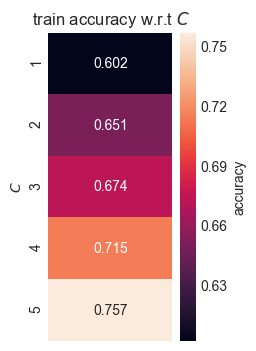

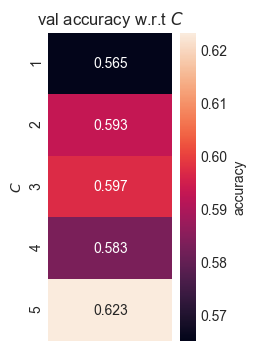

In [67]:
DT_clfGridSearch = decisionTreeTrainValidation(X1_train_val, Y1_train_val, D_list, CV)
accuracyTrain = DT_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = DT_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', D_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', D_list)

In [68]:
best_D = bestValue(accuracyValidation, D_list)
print('Best D: ' + str(best_D))

optimalClassifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_D).fit(X1_train_val, Y1_train_val)
pred = optimalClassifier.predict(X1_test)

accuracyTest = accuracy_score(Y1_test, pred)
DT_accuracyTestList_20_80.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.623246492986 from index 4.
Best D: 5
Test Accuracy Score: 0.63845768653


###### 2nd Run)
Second run uses the variables; X2_train_val, Y2_train_val, X2_test, Y2_test

[ 0.59964097  0.64729666  0.67647519  0.72612738  0.77132026]
[ 0.5511022   0.61122244  0.64128257  0.61923848  0.65130261]


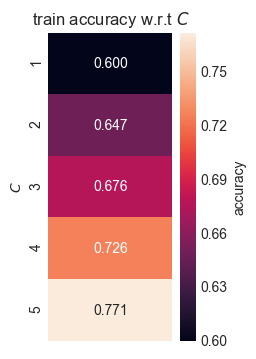

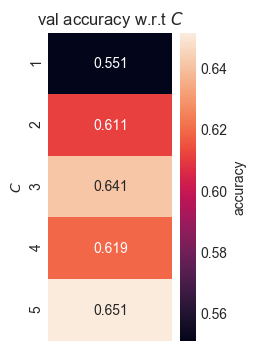

In [69]:
DT_clfGridSearch = decisionTreeTrainValidation(X2_train_val, Y2_train_val, D_list, CV)
accuracyTrain = DT_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = DT_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', D_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', D_list)

In [70]:
best_D = bestValue(accuracyValidation, D_list)
print('Best D: ' + str(best_D))

optimalClassifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_D).fit(X2_train_val, Y2_train_val)
pred = optimalClassifier.predict(X2_test)

accuracyTest = accuracy_score(Y2_test, pred)
DT_accuracyTestList_20_80.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.65130260521 from index 4.
Best D: 5
Test Accuracy Score: 0.655983975964


###### 3rd Run)
Third run uses the variables; X3_train_val, Y3_train_val, X3_test, Y3_test

[ 0.64217287  0.66132161  0.71497866  0.74637636  0.7757701 ]
[ 0.61122244  0.61923848  0.66733467  0.66533066  0.6753507 ]


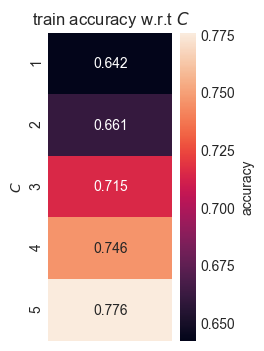

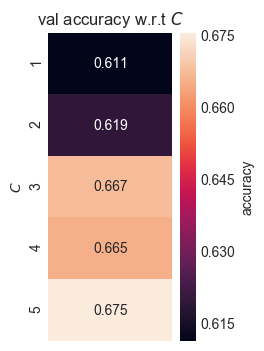

In [71]:
DT_clfGridSearch = decisionTreeTrainValidation(X3_train_val, Y3_train_val, D_list, CV)
accuracyTrain = DT_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = DT_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', D_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', D_list)

In [72]:
best_D = bestValue(accuracyValidation, D_list)
print('Best D: ' + str(best_D))

optimalClassifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_D).fit(X3_train_val, Y3_train_val)
pred = optimalClassifier.predict(X3_test)

accuracyTest = accuracy_score(Y3_test, pred)
DT_accuracyTestList_20_80.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.675350701403 from index 4.
Best D: 5
Test Accuracy Score: 0.660991487231


###### Mean of DT's Test Accuracies on (20% train, 80% test)

In [73]:
print('DT_accuracyTestList:' + str(DT_accuracyTestList_20_80))
DT_accuracyAverage_20_80 = statistics.mean(DT_accuracyTestList_20_80)
print('DT_accuracyTestList mean: ' + str(DT_accuracyAverage_20_80))

DT_accuracyTestList:[0.63845768652979473, 0.65598397596394586, 0.66099148723084622]
DT_accuracyTestList mean: 0.651811049908


### **<font color=green>Results of Decision Tree</font>**

In [74]:
print('DT_accuracyTestList (80% train, 20% test) partition mean: ' + str(DT_accuracyAverage_80_20))
print('DT_accuracyTestList (50% train, 50% test) partition mean: ' + str(DT_accuracyAverage_50_50))
print('DT_accuracyTestList (20% train, 80% test) partition mean: ' + str(DT_accuracyAverage_20_80))

DT_accuracyTestList (80% train, 20% test) partition mean: 0.689333333333
DT_accuracyTestList (50% train, 50% test) partition mean: 0.689636752137
DT_accuracyTestList (20% train, 80% test) partition mean: 0.651811049908


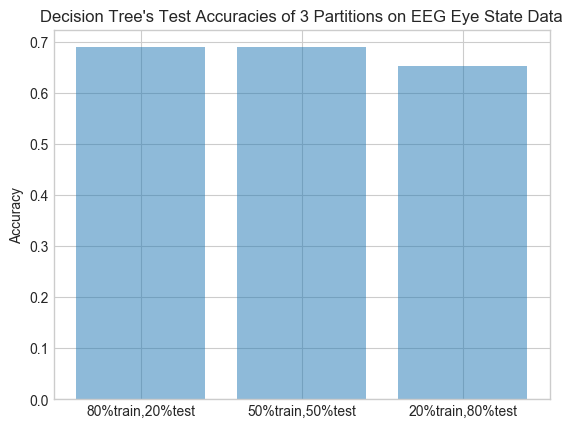

Accuracy of DT's 3 trials on (80% train, 20% test) partition :[0.70599999999999996, 0.66400000000000003, 0.69799999999999995]
Mean Accuracy of DT on (80% train, 20% test) partition: 0.689333333333

Accuracy of DT's 3 trials on (50% train, 50% test) partition :[0.7203525641025641, 0.68990384615384615, 0.65865384615384615]
Mean Accuracy of DT on (50% train, 50% test) partition: 0.689636752137

Accuracy of DT's 3 trials on (20% train, 80% test) partition:[0.63845768652979473, 0.65598397596394586, 0.66099148723084622]
Mean Accuracy of DT on (20% train, 80% test) partition: 0.651811049908


In [75]:
displayAccuracies('Decision Tree', 'EEG Eye State Data', DT_accuracyAverage_80_20, DT_accuracyAverage_50_50, DT_accuracyAverage_20_80)
printAccuracies('DT', DT_accuracyTestList_80_20, DT_accuracyTestList_50_50, DT_accuracyTestList_20_80)

# Random Forest
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

In [76]:
#Global Variables For Random Forest
max_depth_List = [1,2,3,4,5]
RF_accuracyTestList_80_20 = []
RF_accuracyTestList_50_50 = []
RF_accuracyTestList_20_80 = []

In [77]:
from sklearn.ensemble import RandomForestClassifier

#max_depth_List: The chosen hyperparameter.
#cv: Number of folds when doing cross validation.
def randomForestTrainValidation(X_train_val, Y_train_val, max_depth_List, CV):
    
    #svm_classifier = svm.SVC(kernel = 'linear')
    RF_classifier = RandomForestClassifier()
  
    parameters = {'max_depth':max_depth_List}
    
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }
    
    RF_clfGridSearch = GridSearchCV(RF_classifier, param_grid=parameters, cv=CV, return_train_score=True)
    RF_clfGridSearch.fit(X_train_val, Y_train_val)

    return RF_clfGridSearch

### Random Forest on (80% train, 20% test)
Splits the 3 shuffled datasets into 2 parts:
1. (80% of all the data points) ---> Training set + Validation Set.
2. (20% of all the data points) ---> Test set.

In [78]:
X1_train_val, Y1_train_val, X1_test, Y1_test = partitionData(X1, Y1, 0.8)
X2_train_val, Y2_train_val, X2_test, Y2_test = partitionData(X2, Y2, 0.8)
X3_train_val, Y3_train_val, X3_test, Y3_test = partitionData(X3, Y3, 0.8)

###### 1st Run)
First run uses the variables; X1_train_val, Y1_train_val, X1_test, Y1_test

[ 0.60938441  0.67295865  0.72283726  0.76029836  0.80305195]
[ 0.59018036  0.64378758  0.69138277  0.70891784  0.74799599]


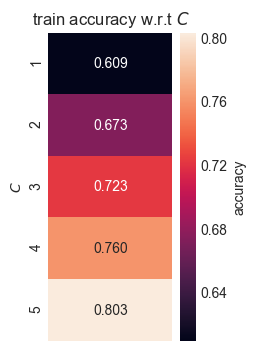

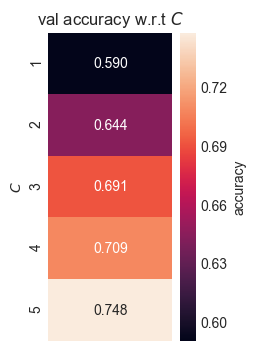

In [79]:
RF_clfGridSearch = randomForestTrainValidation(X1_train_val, Y1_train_val, max_depth_List, CV)
accuracyTrain = RF_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = RF_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', max_depth_List)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', max_depth_List)

In [80]:
best_max_depth = bestValue(accuracyValidation, max_depth_List)
print('Best max_depth: ' + str(best_max_depth))

optimalClassifier = RandomForestClassifier(max_depth=best_max_depth).fit(X1_train_val, Y1_train_val)
pred = optimalClassifier.predict(X1_test)

accuracyTest = accuracy_score(Y1_test, pred)
RF_accuracyTestList_80_20.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.747995991984 from index 4.
Best max_depth: 5
Test Accuracy Score: 0.758


###### 2nd Run)
Second run uses the variables; X2_train_val, Y2_train_val, X2_test, Y2_test

[ 0.61183355  0.67624259  0.71910616  0.74743778  0.78612599]
[ 0.6012024   0.65130261  0.69739479  0.70340681  0.71793587]


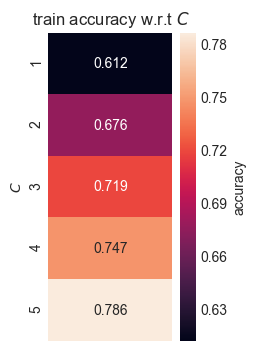

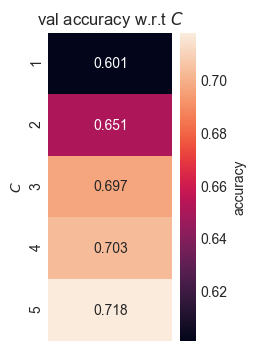

In [81]:
RF_clfGridSearch = randomForestTrainValidation(X2_train_val, Y2_train_val, max_depth_List, CV)
accuracyTrain = RF_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = RF_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', max_depth_List)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', max_depth_List)

In [82]:
best_max_depth = bestValue(accuracyValidation, max_depth_List)
print('Best max_depth: ' + str(best_max_depth))

optimalClassifier = RandomForestClassifier(max_depth=best_max_depth).fit(X2_train_val, Y2_train_val)
pred = optimalClassifier.predict(X2_test)

accuracyTest = accuracy_score(Y2_test, pred)
RF_accuracyTestList_80_20.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.717935871743 from index 4.
Best max_depth: 5
Test Accuracy Score: 0.738


###### 3rd Run)
Third run uses the variables; X3_train_val, Y3_train_val, X3_test, Y3_test

[ 0.61639804  0.65213726  0.71131031  0.75517649  0.79720617]
[ 0.60671343  0.62675351  0.69138277  0.71943888  0.73547094]


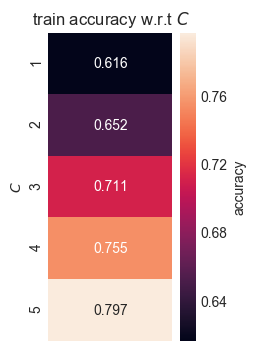

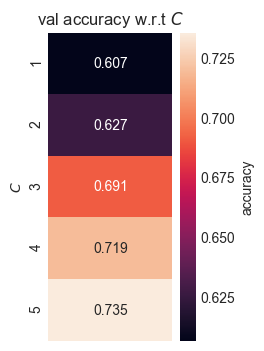

In [83]:
RF_clfGridSearch = randomForestTrainValidation(X3_train_val, Y3_train_val, max_depth_List, CV)
accuracyTrain = RF_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = RF_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', max_depth_List)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', max_depth_List)

In [84]:
best_max_depth = bestValue(accuracyValidation, max_depth_List)
print('Best max_depth: ' + str(best_max_depth))

optimalClassifier = RandomForestClassifier(max_depth=best_max_depth).fit(X3_train_val, Y3_train_val)
pred = optimalClassifier.predict(X3_test)

accuracyTest = accuracy_score(Y3_test, pred)
RF_accuracyTestList_80_20.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.735470941884 from index 4.
Best max_depth: 5
Test Accuracy Score: 0.716


###### Mean of RF's Test Accuracies on (80% train, 20% test)

In [85]:
print('RF_accuracyTestList:' + str(RF_accuracyTestList_80_20))
RF_accuracyAverage_80_20 = statistics.mean(RF_accuracyTestList_80_20)
print('RF_accuracyTestList mean: ' + str(RF_accuracyAverage_80_20))

RF_accuracyTestList:[0.75800000000000001, 0.73799999999999999, 0.71599999999999997]
RF_accuracyTestList mean: 0.737333333333


### Random Forest on (50% train, 50% test)
Splits the 3 shuffled datasets into 2 parts:
1. (50% of all the data points) ---> Training set + Validation Set.
2. (50% of all the data points) ---> Test set.

In [86]:
X1_train_val, Y1_train_val, X1_test, Y1_test = partitionData(X1, Y1, 0.5)
X2_train_val, Y2_train_val, X2_test, Y2_test = partitionData(X2, Y2, 0.5)
X3_train_val, Y3_train_val, X3_test, Y3_test = partitionData(X3, Y3, 0.5)

###### 1st Run)
First run uses the variables; X1_train_val, Y1_train_val, X1_test, Y1_test

[ 0.60229382  0.67245466  0.73245967  0.77412412  0.81196881]
[ 0.5849359   0.64102564  0.69230769  0.70192308  0.71233974]


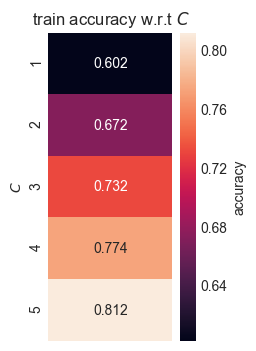

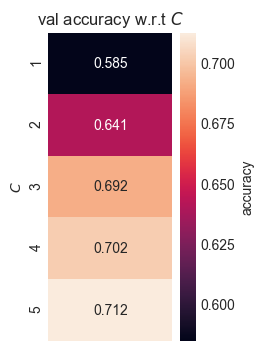

In [87]:
RF_clfGridSearch = randomForestTrainValidation(X1_train_val, Y1_train_val, max_depth_List, CV)
accuracyTrain = RF_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = RF_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', max_depth_List)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', max_depth_List)

In [88]:
best_max_depth = bestValue(accuracyValidation, max_depth_List)
print('Best max_depth: ' + str(best_max_depth))

optimalClassifier = RandomForestClassifier(max_depth=best_max_depth).fit(X1_train_val, Y1_train_val)
pred = optimalClassifier.predict(X1_test)

accuracyTest = accuracy_score(Y1_test, pred)
RF_accuracyTestList_50_50.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.71233974359 from index 4.
Best max_depth: 5
Test Accuracy Score: 0.740384615385


###### 2nd Run)
Second run uses the variables; X2_train_val, Y2_train_val, X2_test, Y2_test

[ 0.61520792  0.66204224  0.71990644  0.75409272  0.79985332]
[ 0.59775641  0.63862179  0.67067308  0.69711538  0.70112179]


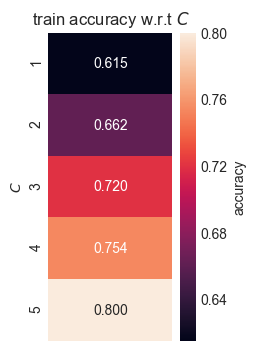

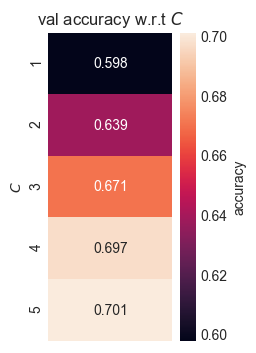

In [89]:
RF_clfGridSearch = randomForestTrainValidation(X2_train_val, Y2_train_val, max_depth_List, CV)
accuracyTrain = RF_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = RF_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', max_depth_List)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', max_depth_List)

In [90]:
best_max_depth = bestValue(accuracyValidation, max_depth_List)
print('Best max_depth: ' + str(best_max_depth))

optimalClassifier = RandomForestClassifier(max_depth=best_max_depth).fit(X2_train_val, Y2_train_val)
pred = optimalClassifier.predict(X2_test)

accuracyTest = accuracy_score(Y2_test, pred)
RF_accuracyTestList_50_50.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.701121794872 from index 4.
Best max_depth: 5
Test Accuracy Score: 0.728365384615


###### 3rd Run)
Third run uses the variables; X3_train_val, Y3_train_val, X3_test, Y3_test

[ 0.60550278  0.66817941  0.72489527  0.76878357  0.8138367 ]
[ 0.5849359   0.66105769  0.67467949  0.69791667  0.72676282]


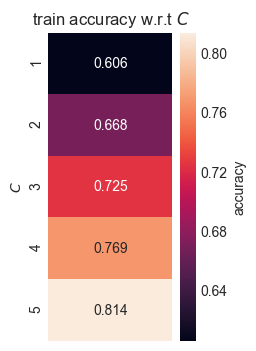

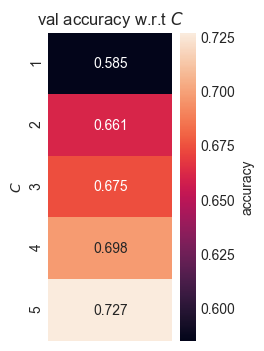

In [91]:
RF_clfGridSearch = randomForestTrainValidation(X3_train_val, Y3_train_val, max_depth_List, CV)
accuracyTrain = RF_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = RF_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', max_depth_List)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', max_depth_List)

In [92]:
best_max_depth = bestValue(accuracyValidation, max_depth_List)
print('Best max_depth: ' + str(best_max_depth))

optimalClassifier = RandomForestClassifier(max_depth=best_max_depth).fit(X3_train_val, Y3_train_val)
pred = optimalClassifier.predict(X3_test)

accuracyTest = accuracy_score(Y3_test, pred)
RF_accuracyTestList_50_50.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.726762820513 from index 4.
Best max_depth: 5
Test Accuracy Score: 0.728365384615


###### Mean of RF's Test Accuracies on (50% train, 50% test)

In [93]:
print('RF_accuracyTestList:' + str(RF_accuracyTestList_50_50))
RF_accuracyAverage_50_50 = statistics.mean(RF_accuracyTestList_50_50)
print('RF_accuracyTestList mean: ' + str(RF_accuracyAverage_50_50))

RF_accuracyTestList:[0.74038461538461542, 0.72836538461538458, 0.72836538461538458]
RF_accuracyTestList mean: 0.732371794872


### Random Forest on (20% train, 80% test)
Splits the 3 shuffled datasets into 2 parts:
1. (20% of all the data points) ---> Training set + Validation Set.
2. (80% of all the data points) ---> Test set.

In [94]:
X1_train_val, Y1_train_val, X1_test, Y1_test = partitionData(X1, Y1, 0.2)
X2_train_val, Y2_train_val, X2_test, Y2_test = partitionData(X2, Y2, 0.2)
X3_train_val, Y3_train_val, X3_test, Y3_test = partitionData(X3, Y3, 0.2)

###### 1st Run)
First run uses the variables; X1_train_val, Y1_train_val, X1_test, Y1_test

[ 0.60988896  0.66598859  0.72901232  0.79158564  0.83856822]
[ 0.59318637  0.61122244  0.64729459  0.63927856  0.66533066]


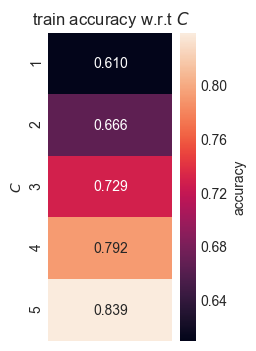

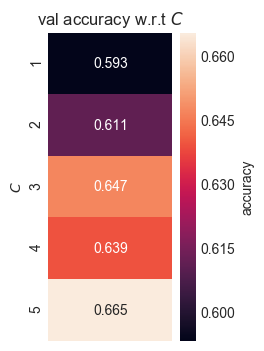

In [95]:
RF_clfGridSearch = randomForestTrainValidation(X1_train_val, Y1_train_val, max_depth_List, CV)
accuracyTrain = RF_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = RF_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', max_depth_List)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', max_depth_List)

In [96]:
best_max_depth = bestValue(accuracyValidation, max_depth_List)
print('Best max_depth: ' + str(best_max_depth))

optimalClassifier = RandomForestClassifier(max_depth=best_max_depth).fit(X1_train_val, Y1_train_val)
pred = optimalClassifier.predict(X1_test)

accuracyTest = accuracy_score(Y1_test, pred)
RF_accuracyTestList_20_80.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.665330661323 from index 4.
Best max_depth: 5
Test Accuracy Score: 0.667000500751


###### 2nd Run)
Second run uses the variables; X2_train_val, Y2_train_val, X2_test, Y2_test

[ 0.60209581  0.68493649  0.74215216  0.80159651  0.86328442]
[ 0.56513026  0.61723447  0.61322645  0.63927856  0.66533066]


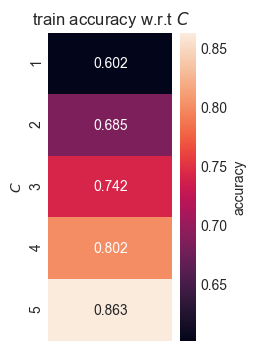

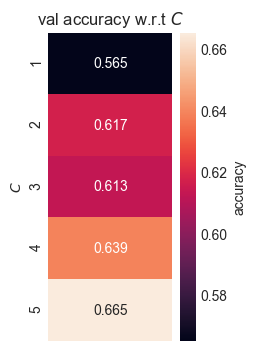

In [97]:
RF_clfGridSearch = randomForestTrainValidation(X2_train_val, Y2_train_val, max_depth_List, CV)
accuracyTrain = RF_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = RF_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', max_depth_List)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', max_depth_List)

In [98]:
best_max_depth = bestValue(accuracyValidation, max_depth_List)
print('Best max_depth: ' + str(best_max_depth))

optimalClassifier = RandomForestClassifier(max_depth=best_max_depth).fit(X2_train_val, Y2_train_val)
pred = optimalClassifier.predict(X2_test)

accuracyTest = accuracy_score(Y2_test, pred)
RF_accuracyTestList_20_80.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.665330661323 from index 4.
Best max_depth: 5
Test Accuracy Score: 0.695042563846


###### 3rd Run)
Third run uses the variables; X3_train_val, Y3_train_val, X3_test, Y3_test

[ 0.63105285  0.69784977  0.74861199  0.80315793  0.84858832]
[ 0.60721443  0.64128257  0.66533066  0.68737475  0.71543086]


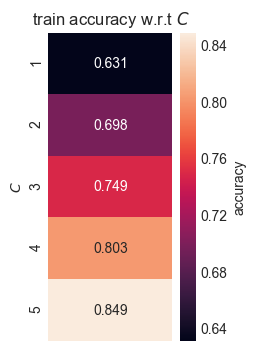

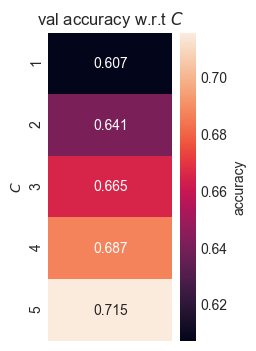

In [99]:
RF_clfGridSearch = randomForestTrainValidation(X3_train_val, Y3_train_val, max_depth_List, CV)
accuracyTrain = RF_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = RF_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', max_depth_List)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', max_depth_List)

In [100]:
best_max_depth = bestValue(accuracyValidation, max_depth_List)
print('Best max_depth: ' + str(best_max_depth))

optimalClassifier = RandomForestClassifier(max_depth=best_max_depth).fit(X3_train_val, Y3_train_val)
pred = optimalClassifier.predict(X3_test)

accuracyTest = accuracy_score(Y3_test, pred)
RF_accuracyTestList_20_80.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.715430861723 from index 4.
Best max_depth: 5
Test Accuracy Score: 0.661992989484


###### Mean of RF's Test Accuracies on (20% train, 80% test)

In [101]:
print('RT_accuracyTestList:' + str(RF_accuracyTestList_20_80))
RF_accuracyAverage_20_80 = statistics.mean(RF_accuracyTestList_20_80)
print('RT_accuracyTestList mean: ' + str(RF_accuracyAverage_20_80))

RT_accuracyTestList:[0.66700050075112671, 0.69504256384576868, 0.66199298948422636]
RT_accuracyTestList mean: 0.674678684694


### **<font color=green>Results of Random Forest</font>**

In [102]:
print('RT_accuracyTestList (80% train, 20% test) partition mean: ' + str(RF_accuracyAverage_80_20))
print('RT_accuracyTestList (50% train, 50% test) partition mean: ' + str(RF_accuracyAverage_50_50))
print('RT_accuracyTestList (20% train, 80% test) partition mean: ' + str(RF_accuracyAverage_20_80))

RT_accuracyTestList (80% train, 20% test) partition mean: 0.737333333333
RT_accuracyTestList (50% train, 50% test) partition mean: 0.732371794872
RT_accuracyTestList (20% train, 80% test) partition mean: 0.674678684694


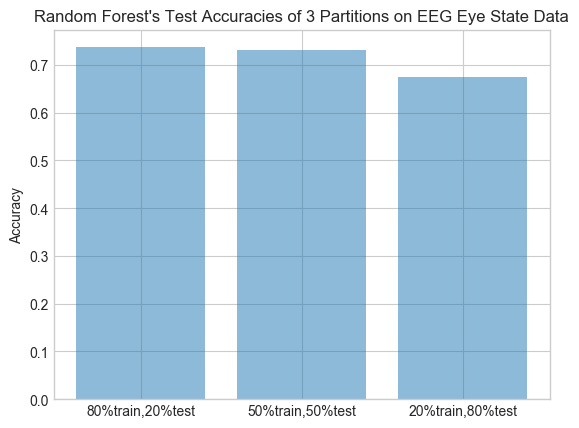

Accuracy of RF's 3 trials on (80% train, 20% test) partition :[0.75800000000000001, 0.73799999999999999, 0.71599999999999997]
Mean Accuracy of RF on (80% train, 20% test) partition: 0.737333333333

Accuracy of RF's 3 trials on (50% train, 50% test) partition :[0.74038461538461542, 0.72836538461538458, 0.72836538461538458]
Mean Accuracy of RF on (50% train, 50% test) partition: 0.732371794872

Accuracy of RF's 3 trials on (20% train, 80% test) partition:[0.66700050075112671, 0.69504256384576868, 0.66199298948422636]
Mean Accuracy of RF on (20% train, 80% test) partition: 0.674678684694


In [103]:
displayAccuracies('Random Forest', 'EEG Eye State Data', RF_accuracyAverage_80_20, RF_accuracyAverage_50_50, RF_accuracyAverage_20_80)
printAccuracies('RF', RF_accuracyTestList_80_20, RF_accuracyTestList_50_50, RF_accuracyTestList_20_80)

# Results

In [104]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                #'%d' % int(height),
                '%d' % int(height) + '%',
                ha='center', va='bottom')

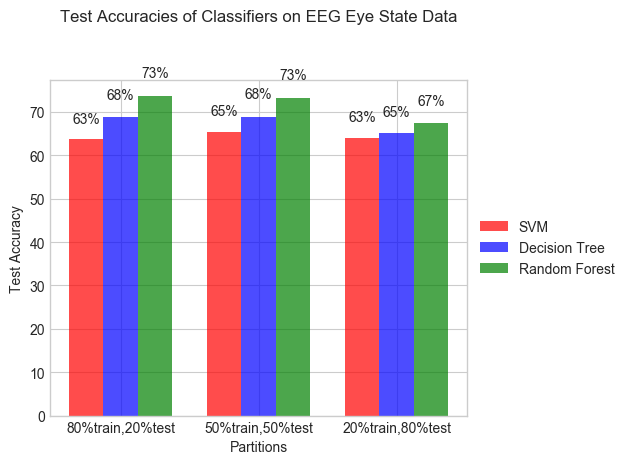

In [105]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 3
SVM_partitions = (SVM_accuracyAverage_80_20*100, SVM_accuracyAverage_50_50*100, SVM_accuracyAverage_20_80*100)
DT_partitions = (DT_accuracyAverage_80_20*100, DT_accuracyAverage_50_50*100, DT_accuracyAverage_20_80*100)
RT_partitions = (RF_accuracyAverage_80_20*100, RF_accuracyAverage_50_50*100, RF_accuracyAverage_20_80*100)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = .25
opacity = .7
 
SVM = plt.bar(index, SVM_partitions, bar_width,#align='center',
                 alpha=opacity,
                 color='r',
                 label='SVM')
 
DT = plt.bar(index + bar_width, DT_partitions, bar_width,#align='center',
                 alpha=opacity,
                 color='b',
                 label='Decision Tree')

RT = plt.bar(index + bar_width + bar_width, RT_partitions, bar_width,#align='center',
                 alpha=opacity,
                 color='g',
                 label='Random Forest')
 
plt.xlabel('Partitions')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracies of Classifiers on EEG Eye State Data', y=1.15)
plt.xticks(index + bar_width, ('80%train,20%test', '50%train,50%test', '20%train,80%test'))
#plt.legend()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

autolabel(SVM)
autolabel(DT)
autolabel(RT)

plt.tight_layout()
plt.grid()
plt.show()